Now, we would like to explore how a NN based model can be built up in a FAIR way. We have already seen how to create a structure of a model directory in previous examples. We will do the same. The necessary scripts have been placed inside the `models/model_02_CDMS-NNRegressor/src` directory. The script called `trainNsave.py` can be run to train the model and save it. To understant how this particular model is being saved, you can inspect the `CDMS_Regressor` method in `model.py`. This class now has a new method called `Save` which uses the `torch.save` functionality to save the NN model at a certain checkpoint. The saved object is essentially a dictionary which stores information about on which epoch the model is being saved, what was the latest value of the evaluated loss, and the *internal state* of the optimizer as well as the NN. The NN's internal state is essentially recording its parameters. First, let's run our code and let it save the trained model.

trainNsave.py:11: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  DL = CDMS_DataLoader(loc='../data/CDMS_Dataset.csv', sep=',')


Saving Model on epoch 0
Epoch 0/100, Training Loss = 23.2817, Validation Loss = 23.2681, Test Loss = 29.9126
Saving Model on epoch 1
Saving Model on epoch 2
Saving Model on epoch 3
Saving Model on epoch 4
Saving Model on epoch 5
Saving Model on epoch 6
Saving Model on epoch 7
Saving Model on epoch 8
Saving Model on epoch 9
Saving Model on epoch 10
Epoch 10/100, Training Loss = 6.4523, Validation Loss = 6.4349, Test Loss = 10.0641
Saving Model on epoch 11
Saving Model on epoch 12
Saving Model on epoch 13
Saving Model on epoch 14
Saving Model on epoch 15
Saving Model on epoch 16
Saving Model on epoch 20
Epoch 20/100, Training Loss = 2.3830, Validation Loss = 2.3580, Test Loss = 2.1810
Saving Model on epoch 26
Epoch 30/100, Training Loss = 1.8995, Validation Loss = 1.8863, Test Loss = 2.2446
Saving Model on epoch 31
Saving Model on epoch 32
Epoch 40/100, Training Loss = 1.9239, Validation Loss = 1.9057, Test Loss = 2.4450
Saving Model on epoch 41
Saving Model on epoch 44
Saving Model on e

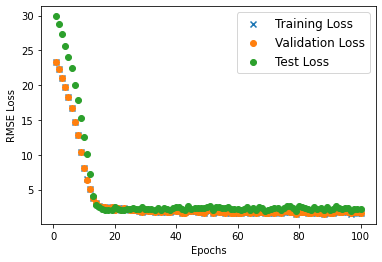

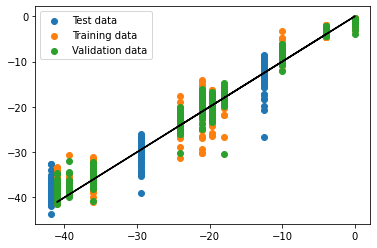

In [1]:
import os
cwd = os.getcwd()
os.chdir('models/model_02_CDMS-NNRegressor/src')
%run -i 'trainNsave.py'
os.chdir(cwd)

Now let's explore the contents of the saved model.

In [2]:
import torch
checkpoint = torch.load("models/model_02_CDMS-NNRegressor/trained-model.pt")
checkpoint_keys = list(checkpoint.keys())
print("Checkpoint keys:", checkpoint_keys)
for key in checkpoint_keys:
    print("key = ", key, "; object type = ", type(checkpoint[key]))

Checkpoint keys: ['epoch', 'model_state_dict', 'optimizer_state_dict', 'loss']
key =  epoch ; object type =  <class 'int'>
key =  model_state_dict ; object type =  <class 'collections.OrderedDict'>
key =  optimizer_state_dict ; object type =  <class 'dict'>
key =  loss ; object type =  <class 'float'>


As we can clearly see, the `epoch` and `loss` keys are essentially an integer and a float respectively. The `model_state_dict` is essentially a dictionary. We can inspect now what it holds.

In [3]:
print(list(checkpoint['model_state_dict'].keys()))

['nn.Linear0.weight', 'nn.Linear0.bias', 'nn.BatchNorm0.weight', 'nn.BatchNorm0.bias', 'nn.BatchNorm0.running_mean', 'nn.BatchNorm0.running_var', 'nn.BatchNorm0.num_batches_tracked', 'nn.Linear1.weight', 'nn.Linear1.bias']


Some of the contents are self-explanatory. For instance, `nn.Linear0.weight` and `nn.Linear0.bias` represents the weights and biases that act on the input layer and generate the outputs associated with the first hidden layer. If we explore their dimensions, it becomes more obvious-

In [4]:
print(checkpoint['model_state_dict']['nn.Linear0.weight'].shape)
print(checkpoint['model_state_dict']['nn.Linear0.bias'].shape)

torch.Size([32, 19])
torch.Size([32])


And similarly, `nn.Linear1.weight` and `nn.Linear1.bias` holds the weights and bias vector for transforming the outputs from the non-linear activation layer to the final output for our model.

**TODO: Add information about batch normalization here**

Finally, we can now explore how to use the saved model for inference. A sample script `inference.py` has been provided. One can use the `load_state_dict` method with any pytorch module object to load the parameters of a saved model. In the `inference.py` script, the model is not trained but rather the parameters are loaded from the saved model

inference.py:10: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  DL = CDMS_DataLoader(loc='../data/CDMS_Dataset.csv', sep=',')


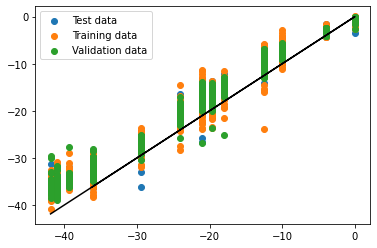

In [6]:
cwd = os.getcwd()
os.chdir('models/model_02_CDMS-NNRegressor/src')
%run -i 'inference.py'
os.chdir(cwd)